# Tarea 3 - Exploración de datos

En esta tarea estaremos poniéndo en práctica la mayor parte de las herramientas que hemos vistos hasta ahora. Estaremos utilizando los datasets provistos por Seaborn.

1. Elija uno de los datasets provistos por Seaborn. Algunas recomendaciones son `flights.csv`, `iris.csv`, `mpg.csv`, `penguins.csv`, `planets.csv`, `tips.csv`, `titanic.csv`. Recuerde cargar el dataset con la función [seaborn.load_dataset](https://seaborn.pydata.org/generated/seaborn.load_dataset.html). La lista completa de datasets se encuentra [en el siguiente enlace](https://github.com/mwaskom/seaborn-data)
1. Cargue sus datos a un nuevo dataframe de Pandas. Importe cualquier otra librería que necesite.
1. Muestre el `head()` de los datos.
1. ¿De qué tamaño es el dataset? ¿cuántas columnas y filas tiene?
1. ¿Cuáles columnas contiene el dataset? ¿Cuáles son los nombres de las columnas?
1. ¿Cuáles valores únicos contiene cada columna?
1. De las columnas de su dataset elegido, elija dos columnas y explique qué significan estas columnas, en términos sencillos.
1. Muestre la distribución cuantitativa de los datos para ambas variables elegidas en el punto anterior utilizando un `boxplot`. Si es necesario, para tener una mejor visualización, elija variables diferentes al punto anterior.
1. Elija uno de los siguientes puntos:

    a. Si sus datos contiene información temporal/de tiempo, como años, meses, días, horas, etc. Cree una gráfica con plt.plot() con alguna de las variables. Por ejemplo: vuelos por año (flights.csv), planetas descubiertos por año (planets.csv), total de la cuenta por día (tips.csv)
    
    b. Si sus datos no contienen información temporal, grafique la comparación entre una de las columnas en un histograma. Por ejemplo 'flipper length' para las 3 diferentes especies de pinguinos (dataset pinguins.csv). Tamaño sepal 'sepal_length' comparado entre las 3 especies. Ver ejemplo
    
9.a <img src='https://i0.wp.com/thecleverprogrammer.com/wp-content/uploads/2020/05/Untitled-8.png?resize=520%2C314&ssl=1' width=400>

9.b <img src='https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/README-flipper-hist-1.png' width=400>

10. Cree dos anotaciones en su gráfica elegida. Cree una anotación solo con texto y elija algún formato para alguno de los puntos de la gráfica.

11. Cree una segunda anotación, utilizando la función `annotate` con la opción de `arrowprops`

12. ¿Cómo se relacionan las variables entre ellas? ¿Hay alguna correlación? Describa esta correlación utilizando la función `df.corr()` donde df es el nombre de su dataframe.

13. Visualizemos mejor las correlaciones. Agregue un `sns.heatmap(df.corr())` ¿Qué puede inferir de esto? ¿Existe alguna variable que se mueva cercano a 1 junto a otra? Escriba una inferencia que puede hacer sobre los datos.

14. Finalmente, visualicemos mejor estas correlaciones con una matriz de distribución, utilice la función `sns.pairplot`. Recuerde definir el parámetro `hue` como las categorías que quiere explorar (especies de planta, especies de pinguino, días, etc). Para ver un ejemplo [siga el siguiente enlace](http://seaborn.pydata.org/examples/scatterplot_matrix.html) ¿Qué otra inferencia puede hacer de sus datos a partir de esta matriz

In [82]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

datos = sns.load_dataset('planets')
datos.head(10)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008
6,Radial Velocity,1,1773.400,4.64,18.15,2002
7,Radial Velocity,1,798.500,NaN,21.41,1996
8,Radial Velocity,1,993.300,10.30,73.10,2008
9,Radial Velocity,2,452.800,1.99,74.79,2010


In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


### Observamos las dimensiones del Dataset:

In [10]:
datos.shape

(1035, 6)

In [11]:
datos.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [12]:
datos.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [13]:
datos.number.unique()

array([1, 2, 3, 5, 4, 6, 7])

In [14]:
datos.orbital_period.unique()

array([2.69300000e+02, 8.74774000e+02, 7.63000000e+02, 3.26030000e+02,
       5.16220000e+02, 1.85840000e+02, 1.77340000e+03, 7.98500000e+02,
       9.93300000e+02, 4.52800000e+02, 8.83000000e+02, 3.35100000e+02,
       4.79100000e+02, 1.07800000e+03, 2.39100000e+03, 1.40020000e+04,
       4.23078500e+00, 1.46510000e+01, 4.43800000e+01, 4.90900000e+03,
       7.36540000e-01, 2.61200000e+02, 4.21500000e+00, 3.80210000e+01,
       1.23010000e+02, 1.16688400e+02, 6.91900000e+02, 9.52700000e+02,
       1.81400000e+02,            nan, 1.02200000e+04, 5.76700000e+03,
       3.32100000e+03, 5.57355000e+03, 2.88350000e+03, 2.90000000e+03,
       4.34350000e+03, 5.84000000e+03, 1.91625000e+03, 3.80800000e+02,
       3.23570000e+00, 6.00000000e+03, 2.50200000e+03, 4.17900000e+02,
       5.94900000e+02, 4.28500000e+02, 9.03300000e+02, 1.25100000e+03,
       1.36750000e+02, 5.30320000e+02, 3.18600000e+03, 2.77020000e+02,
       1.87830000e+02, 1.63000000e+03, 3.98450000e+01, 3.31350000e+00,
      

In [15]:
datos.mass.unique()

array([7.1000e+00, 2.2100e+00, 2.6000e+00, 1.9400e+01, 1.0500e+01,
       4.8000e+00, 4.6400e+00,        nan, 1.0300e+01, 1.9900e+00,
       8.6000e-01, 9.8800e+00, 3.8800e+00, 2.5300e+00, 5.4000e-01,
       1.6400e+00, 4.7200e-01, 8.0000e-01, 1.6500e-01, 3.5300e+00,
       1.7200e-01, 1.6000e-02, 5.7000e-02, 7.2000e-02, 5.3000e+00,
       3.2000e+00, 6.0500e+00, 4.2000e+00, 1.8000e+00, 3.6000e-03,
       1.5500e+00, 7.6000e+00, 8.7800e+00, 1.8500e+00, 2.8000e+00,
       1.7000e+00, 1.0400e+00, 3.9000e+00, 2.0600e+01, 6.8760e-01,
       1.9810e+00, 4.1320e+00, 1.0590e+00, 5.1000e+00, 1.0600e+01,
       4.5000e-02, 3.3000e-01, 2.7000e-02, 1.7000e-01, 1.4700e+00,
       1.1100e+00, 2.1420e+01, 1.2470e+01, 9.1000e-01, 3.9100e+00,
       3.5000e-02, 2.4000e-02, 7.9000e-02, 8.2000e-01, 1.8940e+00,
       1.6000e+00, 2.3000e+00, 1.8000e-02, 4.9000e-02, 1.7000e-02,
       2.2000e-02, 6.0000e-03, 3.2800e-01, 1.2000e-02, 8.0000e-03,
       1.4000e-02, 4.9500e+00, 3.6000e-02, 6.4000e-01, 2.2756e

In [16]:
datos.distance.unique()

array([7.7400e+01, 5.6950e+01, 1.9840e+01, 1.1062e+02, 1.1947e+02,
       7.6390e+01, 1.8150e+01, 2.1410e+01, 7.3100e+01, 7.4790e+01,
       3.9430e+01, 9.7280e+01, 1.4080e+01, 1.5360e+01, 1.2530e+01,
       8.5200e+00, 1.8110e+01, 8.1500e+01, 9.7180e+01, 4.5520e+01,
       1.6500e+02, 1.4000e+02,        nan, 1.4500e+02, 1.3900e+02,
       1.8390e+01, 1.3072e+02, 5.0000e+02, 2.0210e+01, 1.3500e+00,
       1.9280e+01, 3.2200e+00, 7.0420e+01, 4.7530e+01, 3.8520e+01,
       1.3790e+01, 3.1120e+01, 5.2030e+01, 6.2660e+01, 4.6840e+01,
       8.0640e+01, 8.4030e+01, 5.6310e+01, 1.7430e+01, 1.5600e+01,
       9.2510e+01, 1.3470e+01, 7.6900e+00, 3.6000e+01, 1.2210e+01,
       5.2400e+01, 2.5000e+01, 2.6670e+01, 3.7540e+01, 8.0000e+01,
       4.2090e+01, 2.0100e+01, 5.0030e+01, 1.7544e+02, 2.3100e+01,
       2.0000e+02, 6.8000e+02, 1.5000e+02, 3.8000e+02, 4.6000e+02,
       3.4500e+02, 5.6000e+02, 1.1500e+03, 1.0600e+03, 1.3400e+03,
       8.4000e+02, 9.2000e+02, 8.7000e+02, 7.7000e+02, 1.2300e

In [18]:
datos.year.unique()

array([2006, 2008, 2011, 2007, 2009, 2002, 1996, 2010, 2001, 1995, 2004,
       2012, 2013, 2005, 2000, 2003, 1997, 1999, 2014, 1998, 1989, 1992,
       1994])

### Otra forma de verlo en menos pasos, pero un poco más engorroso:

In [19]:
for col in datos:
    print(col, datos[col].unique())

method ['Radial Velocity' 'Imaging' 'Eclipse Timing Variations' 'Transit'
 'Astrometry' 'Transit Timing Variations' 'Orbital Brightness Modulation'
 'Microlensing' 'Pulsar Timing' 'Pulsation Timing Variations']
number [1 2 3 5 4 6 7]
orbital_period [2.69300000e+02 8.74774000e+02 7.63000000e+02 3.26030000e+02
 5.16220000e+02 1.85840000e+02 1.77340000e+03 7.98500000e+02
 9.93300000e+02 4.52800000e+02 8.83000000e+02 3.35100000e+02
 4.79100000e+02 1.07800000e+03 2.39100000e+03 1.40020000e+04
 4.23078500e+00 1.46510000e+01 4.43800000e+01 4.90900000e+03
 7.36540000e-01 2.61200000e+02 4.21500000e+00 3.80210000e+01
 1.23010000e+02 1.16688400e+02 6.91900000e+02 9.52700000e+02
 1.81400000e+02            nan 1.02200000e+04 5.76700000e+03
 3.32100000e+03 5.57355000e+03 2.88350000e+03 2.90000000e+03
 4.34350000e+03 5.84000000e+03 1.91625000e+03 3.80800000e+02
 3.23570000e+00 6.00000000e+03 2.50200000e+03 4.17900000e+02
 5.94900000e+02 4.28500000e+02 9.03300000e+02 1.25100000e+03
 1.36750000e+02 5.3

### De este Dataset la columna mass me indicará la masa del planeta en cuestión, otra de las columnas es orbital_period, que me indica el tiempo que tarda el planeta en dar una vuelta alrededor de su centro atractor

<AxesSubplot:xlabel='orbital_period', ylabel='mass'>

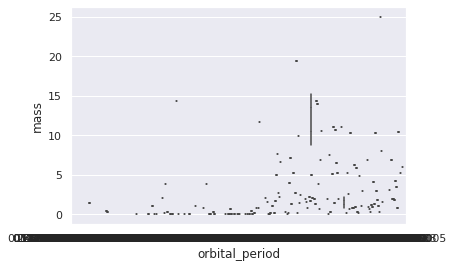

In [20]:
sns.set_theme(style = "darkgrid")
sns.boxplot(x = 'orbital_period', y = 'mass', data = datos)

### Ahora del dataset 'datos' exploramos las entradas de distancia que sean nulas y las eliminamos, el nuevo set de datos estará en datos2:

In [21]:
datos.distance.isnull().value_counts()

False    808
True     227
Name: distance, dtype: int64

In [22]:
datos2 = datos.dropna(subset = ['distance'])
datos2.distance.isnull().value_counts()

False    808
Name: distance, dtype: int64

In [83]:
pd.set_option('display.max_rows', None)
datos2.head(10)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008
6,Radial Velocity,1,1773.400,4.64,18.15,2002
7,Radial Velocity,1,798.500,NaN,21.41,1996
8,Radial Velocity,1,993.300,10.30,73.10,2008
9,Radial Velocity,2,452.800,1.99,74.79,2010


In [66]:
datos2.shape

(808, 6)

### Ahora hacemos una tabla pivote en donde pueda ver las diferentes entradas de distancia por año

In [84]:
datos3 = pd.pivot_table(datos2, index = ['year', 'distance'], columns = None )
datos3['number'] = datos3['number'].astype(int)
pd.set_option('display.max_rows', None)
datos3.head(10)

mass  number  orbital_period
year distance                                 
1989 40.57     11.6800       1       83.888000
1995 15.36      0.4720       1        4.230785
1996 12.53      0.8000       5       14.651000
     13.47      0.6876       4        4.617033
     14.08      2.5300       3     1078.000000
     15.60      3.9000       1        3.313500
     18.11         NaN       1      116.688400
     21.41         NaN       1      798.500000
1997 17.43      1.0400       1       39.845000
1998 4.70       2.2756       4       61.116600

### Convertimos la tabla pivote en un DataFrame y elimininamos las columnas:

In [26]:
datos4 = pd.DataFrame(datos3)
del datos4['mass']
del datos4['number']
del datos4['orbital_period']

In [85]:
datos4.head(10)

Empty DataFrame
Columns: []
Index: [(1989, 40.57), (1995, 15.36), (1996, 12.53), (1996, 13.47), (1996, 14.08), (1996, 15.6), (1996, 18.11), (1996, 21.41), (1997, 17.43), (1998, 4.7)]

### Ahora pasamos el índice de distancia como columna:

In [86]:
datos5 = datos4.reset_index(level = ['distance'])
datos5.head(10)

,distance
year,
1989,40.57
1995,15.36
1996,12.53
1996,13.47
1996,14.08
1996,15.60
1996,18.11
1996,21.41
1997,17.43


### Creamos un nuevo DataFrame que tome los valores de año y distancia como columnas:

In [87]:
df = datos5.reset_index()
df.head(10)

,year,distance
0,1989,40.57
1,1995,15.36
2,1996,12.53
3,1996,13.47
4,1996,14.08
5,1996,15.60
6,1996,18.11
7,1996,21.41
8,1997,17.43
9,1998,4.70


### Vamos a crear dos arrays para utilizarlos en el ploteo más adelante:

In [53]:
x = df.year
arrayx =[]

for val2 in x:
    arrayx.append(val2)


In [54]:
y = df.distance
arrayy =[]

for val in y:
    arrayy.append(val)
max(arrayy)

8500.0

### Ahora ploteamos los diferentes valores de distancia, por cada año usando el DataFrame datos2:

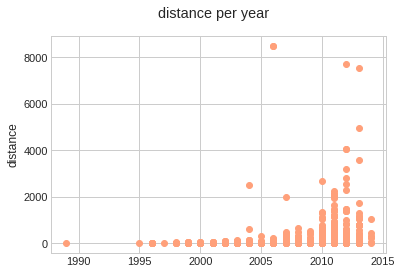

In [32]:
plt.style.use('seaborn-whitegrid')

x = datos2.year
y = datos2.distance


plt.plot(x, y, 'o', color = 'lightsalmon')
plt.suptitle('distance per year')
plt.ylabel('distance')

plt.show()

### Para el plot con las anotaciones usaremos el DataFrame datos5. Usamos este para que no aparezca las otras variables que se presentan en datos2:

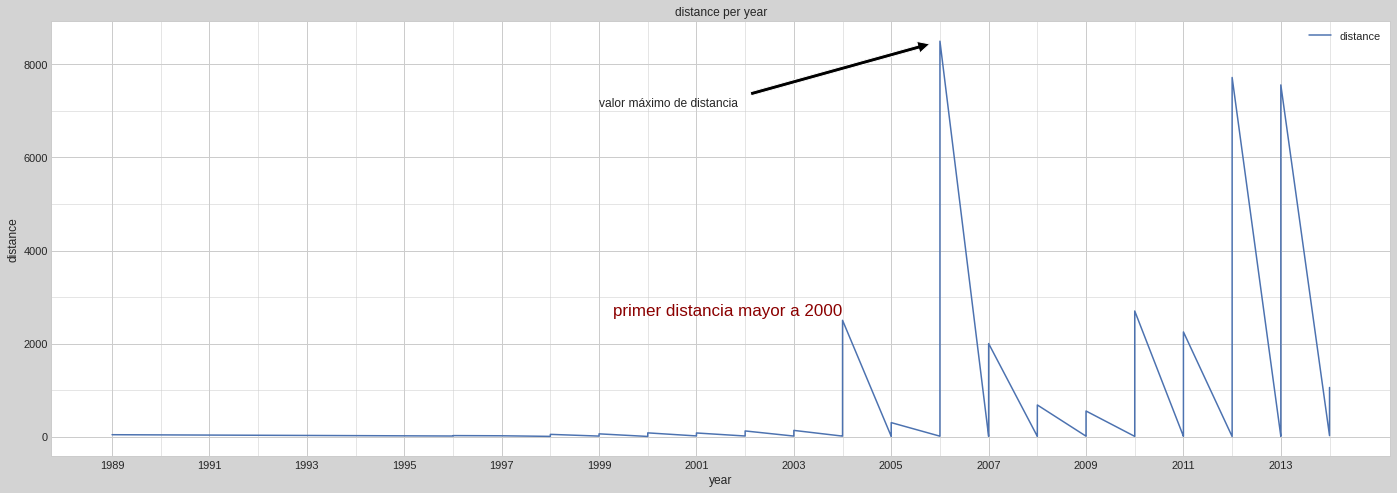

In [50]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(24, 8),facecolor='lightgray')
datos5.plot(ax=ax);

ax.set(title='distance per year', ylabel= 'distance')

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(1989, 2015, 2)
minor_ticks = np.arange(1989, 2015, 1)
minor_ticks2 = np.arange(0, 9000, 1000)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(minor_ticks2, minor=True)

# And a corresponding grid
#ax.grid(which='both')

ax.grid(which='minor', alpha=0.5)
ax.grid(which='major', alpha=1)

style = dict(size=17, color='darkred')
ax.text(2004, 2600, 'primer distancia mayor a 2000', ha = 'right', **style)

ymax = max(arrayy)
xpos = arrayy.index(ymax)
xmax = arrayx[xpos]

ax.annotate('valor máximo de distancia', xy=(xmax, ymax), xytext=(1999,7100),
           arrowprops=dict(facecolor='black', shrink=0.05));


### Ahora vamos a correlacionar los paramétros de años y distancia:

In [55]:
df.corr()

,year,distance
year,1.000000,0.198904
distance,0.198904,1.000000


<AxesSubplot:>

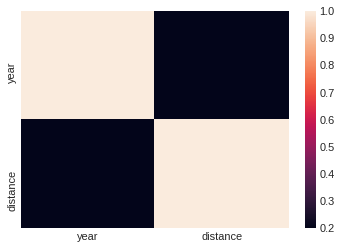

In [56]:
sns.heatmap(df.corr())

### Es evidente que para este caso la corrrelación es casi nula, y para este caso un gráfico está de más porque por la tabla se puede apreciar. Ahora hacemos una correlación con todos los paŕametros:

In [60]:
datos2.corr()

,number,orbital_period,mass,distance,year
number,1.000000,0.025053,-0.249915,-0.033638,0.111716
orbital_period,0.025053,1.000000,0.184906,-0.034365,-0.007155
mass,-0.249915,0.184906,1.000000,0.274082,-0.137946
distance,-0.033638,-0.034365,0.274082,1.000000,0.178922
year,0.111716,-0.007155,-0.137946,0.178922,1.000000


<AxesSubplot:>

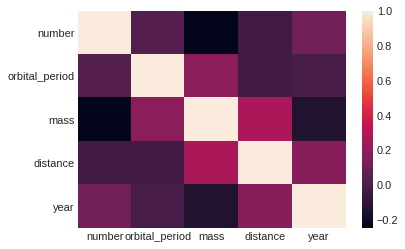

In [61]:
sns.heatmap(datos2.corr())

#### Observando todo el conjunto de datos se puede notar que la correlación sigue siendo muy baja, y aunque hay un rango un poco más grande de colores como se aprecia en el heatmap, no hay variables que se correlacionen lo suficiente para acercarse al valor de 1. Algo que tal vez podría inferir sobre estos datos es que los registros para la variable de distancia no se refieren a la distancia desde el centro atractor el cuál orbitan, ya que de ser así debería existir una correlación para la distancia y el periodo orbital (pues a mayor distancia del cuerpo que orbiten mayor debería ser el periodo orbital). Pero como vemos, la correlación distancia-perido orbital es basicamente de 0, por lo que asumo que los valores de distancia pueden refererirse a la distancia desde nuestro Sol. 

### Ahora haremos la matriz de distribución usando la variable 'method' en cada ploteo, es preferible usar esta ya que la variable method no es ploteada en la correlación, por lo que si se usa en 'hue = ' podremos tener información de esta como de las otras 5 variables

/home/dinier95/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dinier95/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dinier95/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dinier95/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dinier95/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dinier95/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

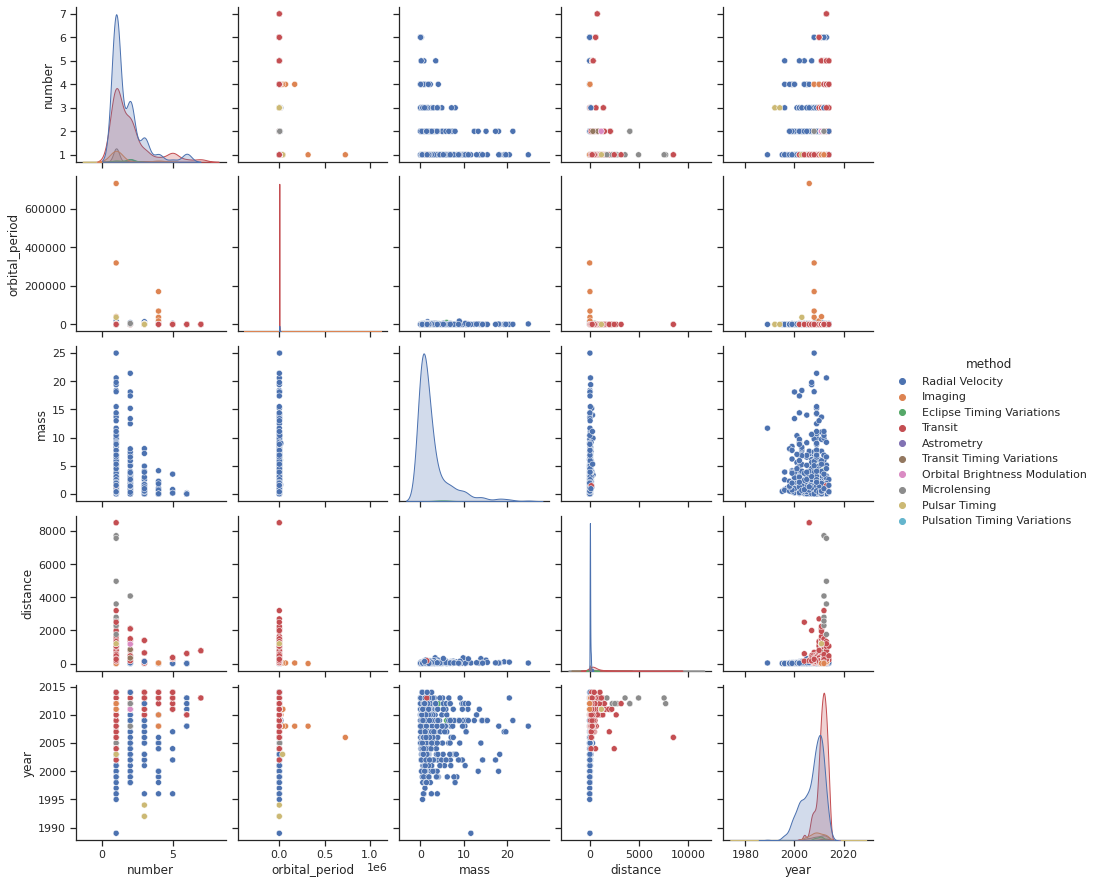

In [79]:
sns.set_theme(style= 'ticks')

df3 = sns.load_dataset('planets')
sns.pairplot(df3, hue= 'method')

#### De estos plots podemos obtener una gran cantidad dde información. Como por ejemplo que casi todos los planetas con una masa entre 0 y 10 descubiertos en este milenio, han sido descubiertos por el método de radial velocity. Por otro lado se puede apreciar que los planetas con distancias más pequeñas que fueron descubiertos antes del 2005 fueron descubiertos por radial velocity, mientras que los más lejanos que se han encotrado recientemente han sido detectados con métodos como transit, y microlensing.
##### Esto es solo un poco de lo que se puede concluir de estos resultados, que gracias al uso de pandas y matplotlib hace que resulten más sencillos de interpretar.

### Acá una visualización con otras variables como referencia en el ploteo, notar que la variable 'method' no aparece:

/home/dinier95/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dinier95/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dinier95/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dinier95/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dinier95/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dinier95/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

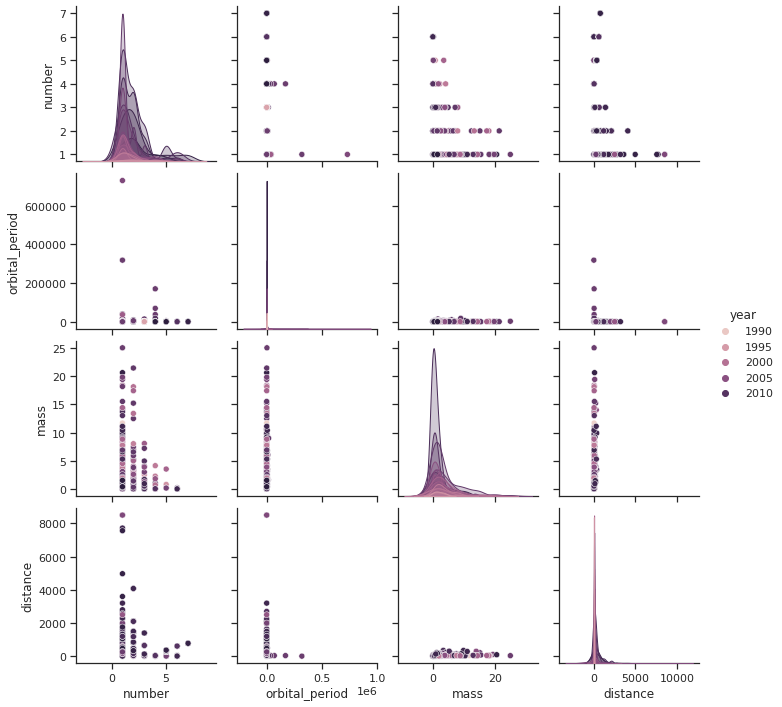

In [81]:
sns.set_theme(style= 'ticks')

df2 = sns.load_dataset('planets')
sns.pairplot(df2, hue= 'year')

/home/dinier95/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dinier95/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dinier95/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


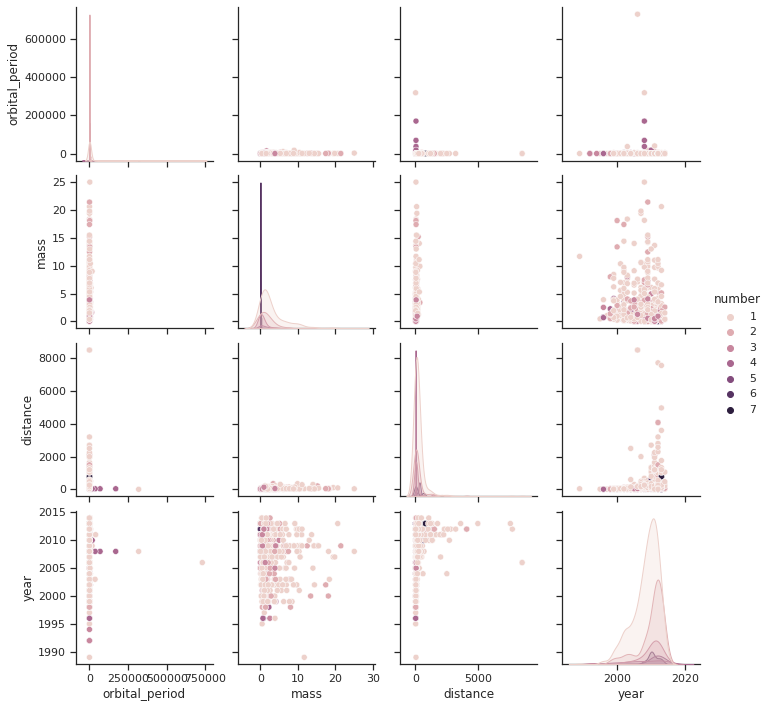

In [80]:
sns.set_theme(style= 'ticks')

df4 = sns.load_dataset('planets')
sns.pairplot(df4, hue= 'number')